In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.57793445205448 153.64017694667075
57.18659026666799 90.33398701007019
54.71062863199151 124.76194475944129
-64.67433427129129 60.52616756455555
-6.659427582741429 -173.0310465171806
-85.51957203888573 -32.50950894943773
-60.88499248926723 -2.7107092938753112
21.951437197587552 17.278349590099793
80.21494900134905 -171.11639770460042
-41.84537340122957 -137.9261530714245
-26.561968439308394 -76.33629317335125
-26.47192092472072 -153.8913914583938
52.68564527171438 131.0301944055966
11.206091697930006 -141.37530330586287
28.797812032343586 22.842872027374796
-28.59418639040942 -149.66581403274208
39.12427879383387 -64.4913323095669
-26.994497141057266 -82.39896155333291
61.55761535934843 -124.05952697883967
18.6450392585635 67.65494822117432
-78.94530052563054 156.42744587330054
30.486357449529777 -27.891983163765417
-47.379013954573175 45.930007144319035
-70.69022601244176 -122.31272579629736
37.53651911389191 -59.80364496911973
45.268120638688856 177.72223361571162
-27.4310473764494

-4.629391184939038 -18.829792072386283
85.86396641296534 165.58459910187196
-78.3370928590225 129.37629662603052
76.83172426089837 18.75168505123935
8.687457896390086 71.58177890528316
85.03441398992774 -140.88282616513158
0.2616062521911573 -11.188304552013989
-66.66729280698816 -37.31324971160248
-72.20380443084852 86.00512738847999
11.771095845252546 -127.35177798000606
-83.71249444298742 48.584142755493474
-26.657595436403 -165.71724097480666
-88.31653318733598 -12.544807776058093
84.42221839642173 140.53443918177516
75.43263140564395 33.26726419160366
-78.88509825893226 -119.10667023797652
-44.25429042658463 86.47668293699508
8.301845003579459 -89.71111754068669
-24.901871211271825 -64.26265228263256
28.496600887236227 -40.63999391866653
53.65641254753302 -58.032299626519844
74.90069148589046 -104.5692604427323
-23.285500532460787 163.45238207407226
62.771715684932815 6.644004389948435
36.06774853025209 106.10410602150347
78.40799148763045 -64.9017028076159
-74.44924190061728 -125

5.651118773874572 -100.99565375229128
16.5465664597442 -70.82940110109568
-31.281913599691492 -53.31756962446077
23.181017815602203 -167.75631794832108
-7.7799339759966415 85.14899568306157
-21.174712002544894 96.14905814290154
70.24714378929414 53.98430754159625
-89.76338975409068 -3.7307799840979783
40.76424162734094 77.1983293096282
11.914609974019868 -119.10581937480842
-17.72580702213095 -167.3985380735032
-0.5769025496206837 -37.711758346356135
49.879907251939585 66.81493658289295
-79.07856094835132 -27.12204257227316
-13.581811539432536 125.74193596932025
-57.60254762160601 -28.226011771502954
-85.31900373781502 -98.12695452053265
70.43265609527447 39.95647503747739
43.555657710299954 -22.420686224676842
-37.39168608056941 -124.90251187506848
1.9498710537731938 139.0479766076067
-77.54345598697566 -176.9616087004443
-62.955855956702656 -25.80971295369193


In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | novobirilyussy
Processing Record 3 of Set 1 | tynda
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | faya
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | vallenar
Processing Record 12 of Set 1 | avera
Processing Record 13 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | jalu
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | shelburne
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | fort nelson
Processing Record 20 of Set 1 | 

Processing Record 38 of Set 4 | mogadishu
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | bundaberg
Processing Record 42 of Set 4 | uspenka
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | umm lajj
Processing Record 48 of Set 4 | gemena
Processing Record 49 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | itoman
Processing Record 2 of Set 5 | pemangkat
Processing Record 3 of Set 5 | bandarban
Processing Record 4 of Set 5 | amapa
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | zomin
Processing Record 8 of Set 5 | joao pinheiro
Processing Record 9 of Set 5 | nikel
Processing Record 10 of Set 5 | kurilsk
Processing Rec

Processing Record 27 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 28 of Set 8 | yurya
City not found. Skipping...
Processing Record 29 of Set 8 | skibbereen
Processing Record 30 of Set 8 | cameron park
Processing Record 31 of Set 8 | auki
Processing Record 32 of Set 8 | lengshuitan
Processing Record 33 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 8 | mozarlandia
Processing Record 35 of Set 8 | librazhd
Processing Record 36 of Set 8 | kittery
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | mayo
Processing Record 39 of Set 8 | gashua
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | tyup
Processing Record 42 of Set 8 | puerto del rosario
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | esso
Processing Record 45 of Set 8 | champasak
Processing Record 46 of Set 8 | mersing
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | nyurba
Processing 

Processing Record 19 of Set 12 | holme
Processing Record 20 of Set 12 | marmaris
Processing Record 21 of Set 12 | havoysund
Processing Record 22 of Set 12 | the valley
Processing Record 23 of Set 12 | gobabis
Processing Record 24 of Set 12 | kalmunai
Processing Record 25 of Set 12 | narrabri
Processing Record 26 of Set 12 | neuquen
Processing Record 27 of Set 12 | liku
Processing Record 28 of Set 12 | ferrol
Processing Record 29 of Set 12 | port-gentil
Processing Record 30 of Set 12 | el tigre
Processing Record 31 of Set 12 | guadalupe y calvo
Processing Record 32 of Set 12 | akdepe
Processing Record 33 of Set 12 | yarada
Processing Record 34 of Set 12 | ganzhou
Processing Record 35 of Set 12 | toamasina
Processing Record 36 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 12 | verkhnyaya inta
Processing Record 38 of Set 12 | mollendo
Processing Record 39 of Set 12 | yantal
Processing Record 40 of Set 12 | lolua
City not found. Skipping...
Proc

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Novobirilyussy,56.9514,90.6661,51.28,76,70,3.29,RU,2022-07-14 00:21:42
1,Tynda,55.1667,124.7167,66.52,89,100,2.68,RU,2022-07-14 00:21:42
2,Ushuaia,-54.8000,-68.3000,35.26,80,40,8.05,AR,2022-07-14 00:17:12
3,Cape Town,-33.9258,18.4232,57.88,94,75,17.27,ZA,2022-07-14 00:20:03
4,Faya,18.3851,42.4509,64.92,60,93,6.06,SA,2022-07-14 00:21:44
5,Rikitea,-23.1203,-134.9692,70.68,80,93,11.79,PF,2022-07-14 00:21:44
6,Vallenar,-28.5708,-70.7581,53.44,74,34,7.27,CL,2022-07-14 00:21:45
7,Avera,33.1940,-82.5271,72.91,79,100,7.02,US,2022-07-14 00:21:46
8,Hilo,19.7297,-155.0900,83.28,97,100,8.99,US,2022-07-14 00:21:46
9,Jalu,29.0331,21.5482,79.83,39,0,14.54,LY,2022-07-14 00:21:47


In [19]:
new_column_order = ['City', 'Country', 'Date',
                    'Lat', 'Lng', 'Max Temp', 'Humidity',
                    'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novobirilyussy,RU,2022-07-14 00:21:42,56.9514,90.6661,51.28,76,70,3.29
1,Tynda,RU,2022-07-14 00:21:42,55.1667,124.7167,66.52,89,100,2.68
2,Ushuaia,AR,2022-07-14 00:17:12,-54.8000,-68.3000,35.26,80,40,8.05
3,Cape Town,ZA,2022-07-14 00:20:03,-33.9258,18.4232,57.88,94,75,17.27
4,Faya,SA,2022-07-14 00:21:44,18.3851,42.4509,64.92,60,93,6.06


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

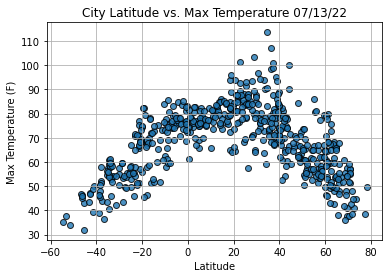

In [22]:
# Build the scatter plot for latitude vs. max temperature.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.scatter(lats,
            max_temps,
            edgecolor = 'black', linewidth = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')


# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

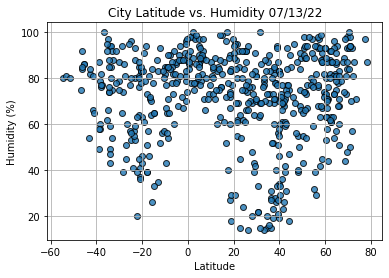

In [23]:
# Build the scatter plots for latitude vs. humidity.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

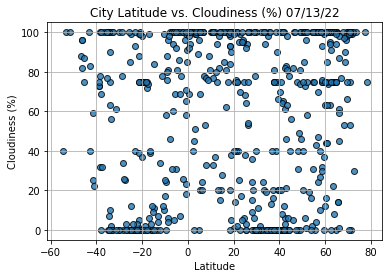

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

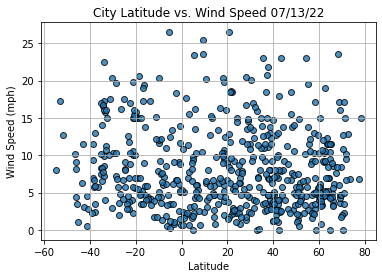

In [25]:
# Build the scatter plots for latitude vs. wind speed.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Add to charts so they look good in light or dark mode
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white')

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novobirilyussy,RU,2022-07-14 00:21:42,56.9514,90.6661,51.28,76,70,3.29
1,Tynda,RU,2022-07-14 00:21:42,55.1667,124.7167,66.52,89,100,2.68
2,Ushuaia,AR,2022-07-14 00:17:12,-54.8000,-68.3000,35.26,80,40,8.05
3,Cape Town,ZA,2022-07-14 00:20:03,-33.9258,18.4232,57.88,94,75,17.27
4,Faya,SA,2022-07-14 00:21:44,18.3851,42.4509,64.92,60,93,6.06
5,Rikitea,PF,2022-07-14 00:21:44,-23.1203,-134.9692,70.68,80,93,11.79
6,Vallenar,CL,2022-07-14 00:21:45,-28.5708,-70.7581,53.44,74,34,7.27
7,Avera,US,2022-07-14 00:21:46,33.1940,-82.5271,72.91,79,100,7.02
8,Hilo,US,2022-07-14 00:21:46,19.7297,-155.0900,83.28,97,100,8.99
9,Jalu,LY,2022-07-14 00:21:47,29.0331,21.5482,79.83,39,0,14.54


In [29]:
index13 = city_data_df.loc[13]
index13

City                  Fort Nelson
Country                        CA
Date          2022-07-14 00:21:48
Lat                       58.8053
Lng                     -122.7002
Max Temp                    62.19
Humidity                       45
Cloudiness                     75
Wind Speed                    0.0
Name: 13, dtype: object

In [30]:
city_data_df['Lat'] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
566     True
567    False
568     True
569    False
570     True
Name: Lat, Length: 571, dtype: bool

In [31]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novobirilyussy,RU,2022-07-14 00:21:42,56.9514,90.6661,51.28,76,70,3.29
1,Tynda,RU,2022-07-14 00:21:42,55.1667,124.7167,66.52,89,100,2.68
4,Faya,SA,2022-07-14 00:21:44,18.3851,42.4509,64.92,60,93,6.06
7,Avera,US,2022-07-14 00:21:46,33.1940,-82.5271,72.91,79,100,7.02
8,Hilo,US,2022-07-14 00:21:46,19.7297,-155.0900,83.28,97,100,8.99


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

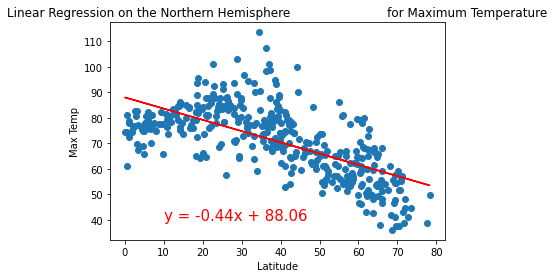

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

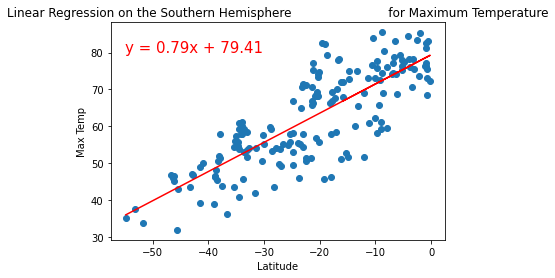

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

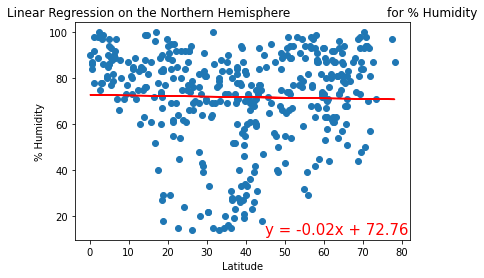

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,12))

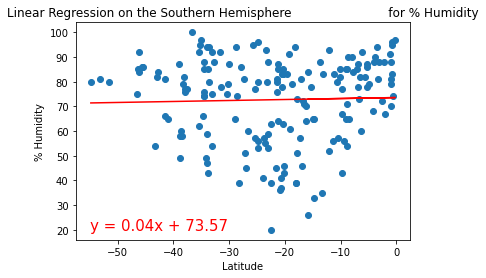

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))


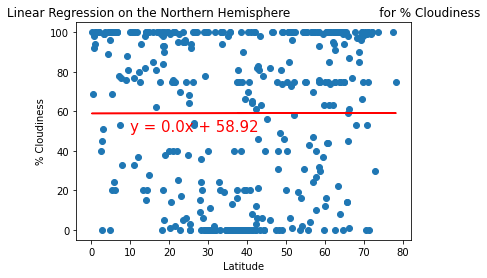

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (10, 50))

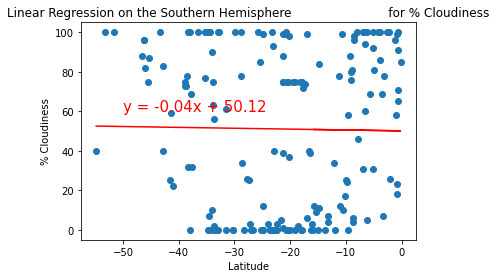

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

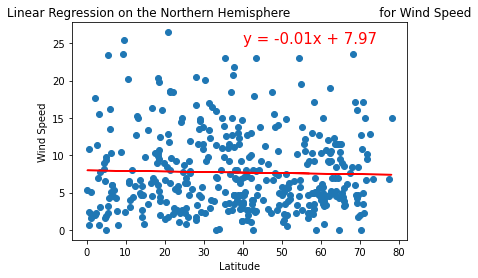

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (40, 25))

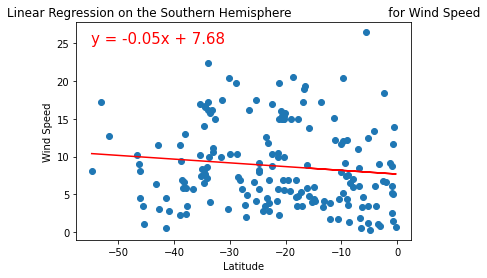

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,25))